In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

In [2]:
ticker = 'AAL'

In [3]:
end_date = dt.datetime.now()
start_date = end_date.replace(hour=0, minute=0)
quotes = yf.download(ticker, start_date, end_date, interval='2m')['Adj Close']
if quotes.empty:
    start_date = (end_date - dt.timedelta(days=1)).replace(hour=0, minute=0)
    end_date = start_date.replace(hour=23, minute=59)
    quotes = yf.download(ticker, start_date, end_date, interval='2m')['Adj Close']
    df= pd.DataFrame(quotes)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (2m 2024-12-07 00:00:34.743806 -> 2024-12-07 16:24:34.743806)')
[*********************100%***********************]  1 of 1 completed


In [4]:
quotes

Ticker,AAL
Datetime,
2024-12-06 14:30:00+00:00,17.969999
2024-12-06 14:32:00+00:00,17.929899
2024-12-06 14:34:00+00:00,17.930901
2024-12-06 14:36:00+00:00,17.870001
2024-12-06 14:38:00+00:00,17.825001
...,...
2024-12-06 20:50:00+00:00,17.365000
2024-12-06 20:52:00+00:00,17.370001
2024-12-06 20:54:00+00:00,17.395000


In [5]:
quotes.index.strftime('%d:%I:%M')

Index(['06:02:30', '06:02:32', '06:02:34', '06:02:36', '06:02:38', '06:02:40',
       '06:02:42', '06:02:44', '06:02:46', '06:02:48',
       ...
       '06:08:40', '06:08:42', '06:08:44', '06:08:46', '06:08:48', '06:08:50',
       '06:08:52', '06:08:54', '06:08:56', '06:08:58'],
      dtype='object', name='Datetime', length=195)

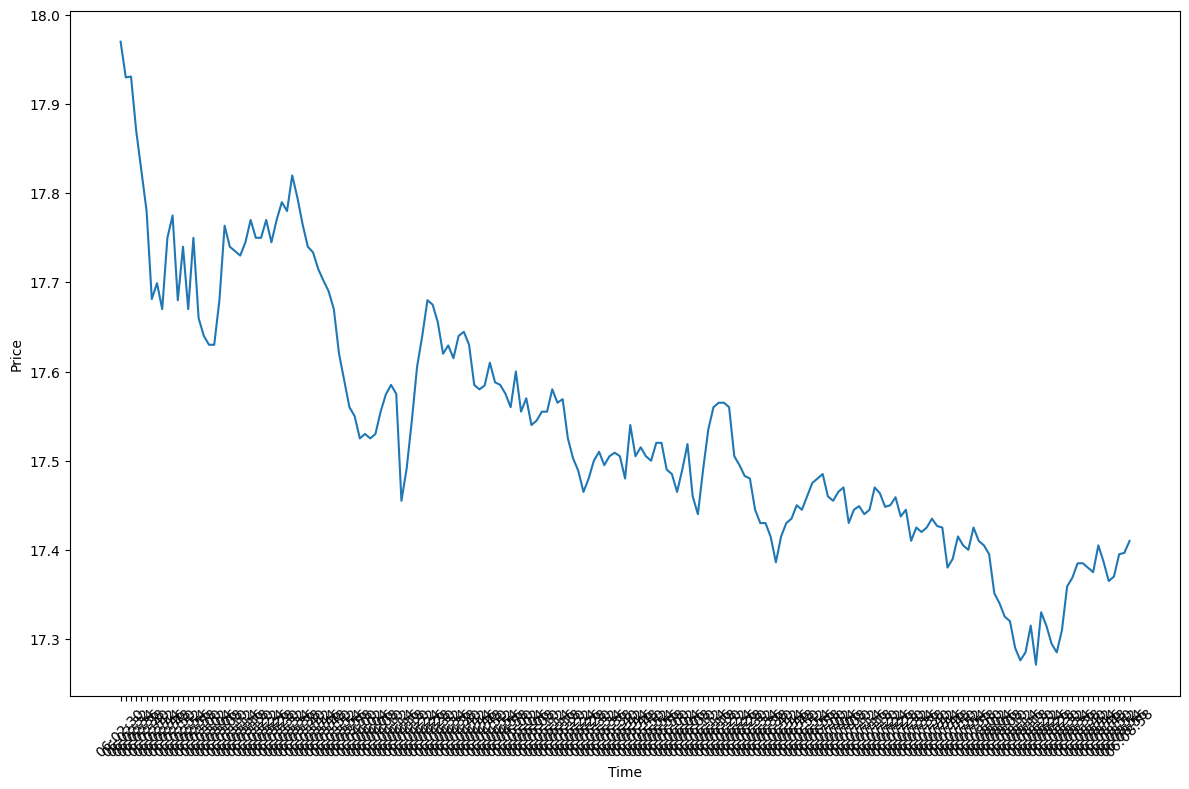

In [6]:
plt.figure(figsize=(12,8))
plt.plot(quotes.index.strftime('%d:%I:%M'),quotes)
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

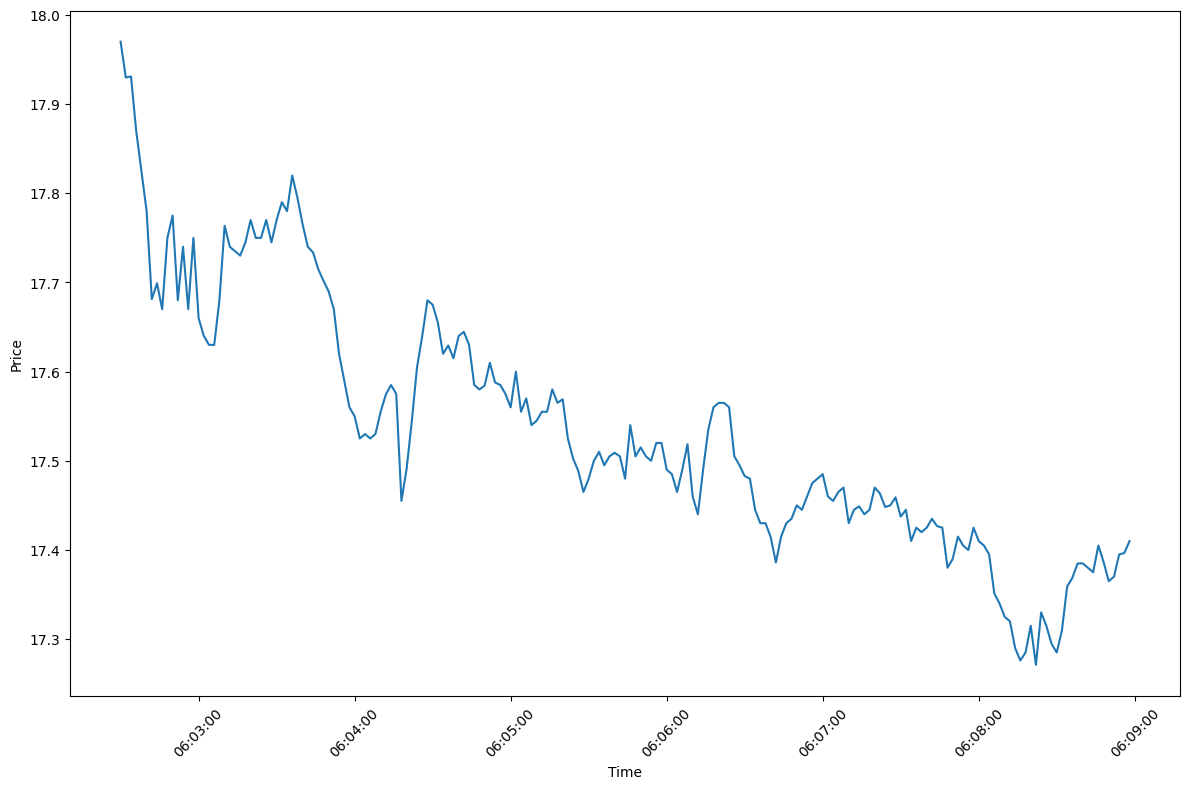

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
plt.plot(df.index, quotes)
plt.xlabel('Time')
plt.ylabel('Price')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%I:%M')) 
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  

plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()
